@Misc{,
    author = {Fernando Nogueira},
    title = {{Bayesian Optimization}: Open source constrained global optimization tool for {Python}},
    year = {2014--},
    url = " https://github.com/fmfn/BayesianOptimization"
}

### pip install bayesian-optimization (in terminal)

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

### Specifying the function to be optimized:

In [53]:
xmin = -100
xmax = 100
ymin = -100
ymax = 100


#Change the function to be optimized here 
def func(x,y):
   
    trig = np.sin(x**2) + 3*y
    power = x**3 - y**2 + x**2 - y + 4
    linear = x - y
    
    return  linear

### Plot the objective function:

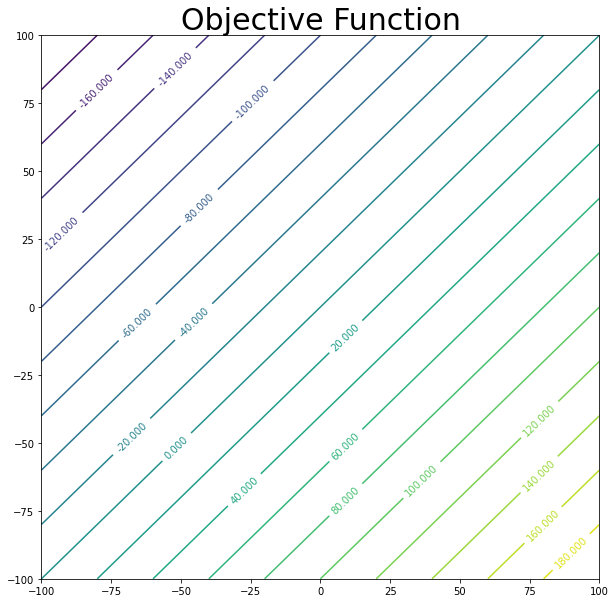

In [54]:
x = np.linspace(xmin,xmax,100)
y = np.linspace(ymin,ymax,100)
xx, yy = np.meshgrid(x,y)
z = func(xx,yy)
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(z, extent=(xmin,xmax,ymin,ymax), levels = 20)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Objective Function', fontsize = 30)
plt.show()

### Directions for using the optimizer:

1. Import the "BayesianOptimization" object.
2. Specify a function to be optimized, f (will be function previously defined). 
3. Specify its parameters with their corresponding bounds, pbounds. (This is a constrained optimization technique, so you must specify the minimum and maximum values that can be probed for each parameter in order for it to work.) These will correspond to the min and max previously defined.

In [55]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space:
pbounds = {'x': (xmin, xmax), 'y': (ymin, ymax)}

optimizer = BayesianOptimization(f=func, pbounds=pbounds, verbose=3) 

### Data Generator (Max Value):

Code runs 100 trials to obtain the actual max value of the objective function. This will be used in the next code to calculate the accuracy which is the (calculated max value / actual max value). **This code only needs to be executed if the objective function is changed.**

In [56]:
optimizer.maximize(init_points = 50, 
                   n_iter = 50);

best_params = optimizer.max["params"]

found_x = best_params['x']
found_y = best_params['y']
max_value = func(found_x, found_y)

print("Found x: {}, f: {}".format(found_x, (func(found_x, found_y))))
print("Found y: {}, f: {}".format(found_y, (func(found_x, found_y))))
print("Max value found is: {}".format(max_value))


|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -23.75    | -47.33    | -23.58    |
|  2        |  94.53    |  65.74    | -28.79    |
|  3        |  108.7    |  29.84    | -78.82    |
|  4        |  39.28    | -42.7     | -81.98    |
|  5        | -36.24    |  6.242    |  42.48    |
|  6        | -59.21    | -4.922    |  54.28    |
|  7        | -11.76    | -46.57    | -34.81    |
|  8        | -152.4    | -99.16    |  53.26    |
|  9        |  61.42    | -35.21    | -96.63    |
|  10       |  41.88    | -8.884    | -50.76    |
|  11       |  69.08    |  51.18    | -17.9     |
|  12       |  54.0     |  63.48    |  9.478    |
|  13       | -76.81    | -62.7     |  14.11    |
|  14       |  51.3     |  25.28    | -26.03    |
|  15       | -172.8    | -82.14    |  90.68    |
|  16       | -29.29    | -31.49    | -2.206    |
|  17       |  85.83    |  43.31    | -42.52    |
|  18       |  22.59    | -40.93    | -63.51    |


|  100      |  196.7    |  97.44    | -99.23    |
Found x: 100.0, f: 200.0
Found y: -100.0, f: 200.0
Max value found is: 200.0


The property <strong>optimizer.max</strong> returns the best combination of parameters and target value found.

This code will generate the calculated max value for an optimization of 10 trials. It will divide that by the actual max value to find the accuracy. The mean_time is the average time taken to perform ONE trial. **Run this code everytime any setting of the optimizer is changed** 

In [57]:
Type_of_function = 'linear'
n_of_params = 2

In [58]:
accuracy = []
mean_time = []
x = []
y = []
z = []
itr_time = []
n_of_trials_vector = []

for i in range(50): 
    start = time.time()
    
    pbounds = {'x': (xmin, xmax), 'y': (ymin, ymax)}
    optimizer = BayesianOptimization(f=func, pbounds=pbounds, verbose=3) 
    random = abs(int(np.round(np.random.randint(1, 5)+1)))
    optimizer.maximize(init_points = random, 
                       n_iter = random)
    
    n_of_trials = random + random
    best_params = optimizer.max["params"]
    found_x = best_params["x"]
    found_y = best_params["y"]
    print("Found x: {}".format(found_x))
    print("Found y: {}".format(found_y))
    print("Max value found is: {}".format(func(found_x, found_y)))
    print("# of trials is: {}".format(n_of_trials))
    x.append(found_x)
    y.append(found_y)
    z.append(func(found_x, found_y)/max_value)
        
    end = time.time()
    timetaken = (end - start)/n_of_trials
    itr_time.append(timetaken)
    n_of_trials_vector.append(n_of_trials)
          
    #acc = np.mean(z)/np.max(z)
    #accuracy.append(acc)
          
    accuracy = z
    mean_time = itr_time
        

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -73.64    | -8.424    |  65.21    |
|  2        | -121.5    | -86.25    |  35.24    |
|  3        | -79.98    |  4.725    |  84.7     |
|  4        |  75.18    |  40.13    | -35.05    |
|  5        |  110.9    |  94.39    | -16.52    |
|  6        |  200.0    |  100.0    | -100.0    |
|  7        |  112.7    |  95.59    | -17.06    |
|  8        |  196.3    |  96.66    | -99.65    |
|  9        |  195.5    |  98.5     | -96.95    |
|  10       |  198.4    |  99.5     | -98.86    |
Found x: 100.0
Found y: -100.0
Max value found is: 200.0
# of trials is: 10
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  126.6    |  85.81    | -40.75    |
|  2        | -10.32    |  31.31    |  41.63    |
|  3        | -26.26    | -94.58    | -68.32    |
|  4        |  127.9    |  86.5     | -41.43    |
|  5        |  200.0    

|  7        |  172.2    |  100.0    | -72.19    |
|  8        |  198.2    |  98.86    | -99.35    |
|  9        |  197.2    |  97.65    | -99.52    |
|  10       |  200.0    |  100.0    | -100.0    |
Found x: 100.0
Found y: -100.0
Max value found is: 200.0
# of trials is: 10
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -27.1     |  39.24    |  66.34    |
|  2        | -38.62    | -86.37    | -47.75    |
|  3        |  29.99    | -60.71    | -90.71    |
|  4        | -156.4    | -68.2     |  88.23    |
|  5        | -15.5     | -50.9     | -35.4     |
|  6        |  28.42    | -62.0     | -90.42    |
|  7        |  176.0    |  76.0     | -100.0    |
|  8        |  200.0    |  100.0    | -100.0    |
|  9        |  177.5    |  100.0    | -77.48    |
|  10       |  198.2    |  99.55    | -98.67    |
Found x: 100.0
Found y: -100.0
Max value found is: 200.0
# of trials is: 10
|   iter    |  target   |     x     |     y     

|  7        |  196.4    |  97.78    | -98.6     |
|  8        |  196.4    |  97.78    | -98.6     |
|  9        |  196.4    |  97.78    | -98.6     |
|  10       |  196.4    |  97.78    | -98.6     |
Found x: 100.0
Found y: -100.0
Max value found is: 200.0
# of trials is: 10
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -31.0     |  45.84    |  76.84    |
|  2        |  118.4    |  77.55    | -40.84    |
|  3        | -61.48    | -66.2     | -4.724    |
|  4        |  77.68    |  53.37    | -24.31    |
|  5        |  116.0    |  75.54    | -40.42    |
|  6        |  200.0    |  100.0    | -100.0    |
|  7        |  190.6    |  90.6     | -100.0    |
|  8        |  200.0    |  100.0    | -100.0    |
Found x: 100.0
Found y: -100.0
Max value found is: 200.0
# of trials is: 8
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -46.69    | -78.53    | -31.84    |

|  5        |  200.0    |  100.0    | -100.0    |
|  6        |  197.3    |  99.22    | -98.06    |
|  7        |  0.0      | -100.0    | -100.0    |
|  8        |  200.0    |  100.0    | -100.0    |
Found x: 100.0
Found y: -100.0
Max value found is: 200.0
# of trials is: 8
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -79.82    | -32.0     |  47.81    |
|  2        | -107.6    | -46.14    |  61.48    |
|  3        | -79.47    | -32.71    |  46.76    |
|  4        | -54.66    | -19.17    |  35.5     |
Found x: -19.16628658926589
Found y: 35.49803615280579
Max value found is: -54.664322742071676
# of trials is: 4
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  40.26    |  49.23    |  8.978    |
|  2        |  179.5    |  85.03    | -94.48    |
|  3        |  21.63    |  50.6     |  28.97    |
|  4        |  94.45    | -5.553    | -100.0    |
|  5        

|  6        |  200.0    |  100.0    | -100.0    |
|  7        |  196.4    |  98.7     | -97.68    |
|  8        |  200.0    |  100.0    | -100.0    |
Found x: 100.0
Found y: -100.0
Max value found is: 200.0
# of trials is: 8
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -64.84    |  5.337    |  70.18    |
|  2        | -66.23    | -57.46    |  8.769    |
|  3        |  47.08    |  12.87    | -34.21    |
|  4        | -92.85    | -40.71    |  52.14    |
|  5        | -94.11    | -6.328    |  87.78    |
|  6        |  125.2    |  81.64    | -43.6     |
|  7        |  123.3    |  81.55    | -41.72    |
|  8        |  200.0    |  100.0    | -100.0    |
|  9        |  198.3    |  98.78    | -99.52    |
|  10       |  197.5    |  97.91    | -99.55    |
Found x: 100.0
Found y: -100.0
Max value found is: 200.0
# of trials is: 10
|   iter    |  target   |     x     |     y     |
-------------------------------------------------

In [59]:
Type_of_optimizer = 'Bayes'
n_of_trials_vector = np.asarray(n_of_trials_vector).reshape(-1,1)
accuracy = np.asarray(accuracy).reshape(-1,1)
mean_time = np.asarray(mean_time).reshape(-1,1)
type_of_opt = np.asarray([Type_of_optimizer]*accuracy.shape[0]).reshape(-1,1)
num_of_params = np.asarray([n_of_params]*accuracy.shape[0]).reshape(-1,1)
type_of_func = np.asarray([Type_of_function]*accuracy.shape[0]).reshape(-1,1)
data = np.hstack((n_of_trials_vector, num_of_params, type_of_func, accuracy, mean_time, type_of_opt))
df_Bayes = pd.DataFrame(data, columns=['number of trials','number of parameters','type of function','accuracy [calc. max/ actual max]', 'time per trial [s]', 'type_of_opt'])

In [60]:
df_Bayes

,number of trials,number of parameters,type of function,accuracy [calc. max/ actual max],time per trial [s],type_of_opt
0,10,2,linear,1.0,0.06699950695037842,Bayes
1,6,2,linear,1.0,0.03922518094380697,Bayes
2,4,2,linear,-0.16308105034076978,0.01851475238800049,Bayes
3,8,2,linear,1.0,0.05011850595474243,Bayes
4,6,2,linear,0.8304282840376428,0.029804189999898274,Bayes
5,8,2,linear,0.9820884757642054,0.0393296480178833,Bayes
6,6,2,linear,0.9824881447754896,0.033686319986979164,Bayes
7,8,2,linear,1.0,0.05019912123680115,Bayes
8,6,2,linear,1.0,0.03757313887278239,Bayes
9,8,2,linear,1.0,0.035491764545440674,Bayes


In [63]:
df_data_main = df_data_main.append(df_Bayes)

In [64]:
df_data_main

,number of trials,number of parameters,type of function,accuracy [calc. max/ actual max],time per trial [s],type_of_opt
0,4,2,trig,0.9888931021706469,0.04071277379989624,Bayes
1,6,2,trig,0.9957604871320944,0.041262189547220864,Bayes
2,10,2,trig,0.9982711982341503,0.0579129695892334,Bayes
3,6,2,trig,0.9991878022021842,0.05791036287943522,Bayes
4,6,2,trig,0.9957604871320944,0.031154831250508625,Bayes
...,...,...,...,...,...,...
45,10,2,linear,1.0,0.06160938739776611,Bayes
46,8,2,linear,1.0,0.04802200198173523,Bayes
47,10,2,linear,1.0,0.061577773094177245,Bayes
48,4,2,linear,0.5876156316026659,0.009226739406585693,Bayes


In [65]:
df_data_main.to_excel('Data_Bayes_1.xlsx')